In [1]:
import sys
sys.path.append('CONFIG_files/')

In [2]:
import numpy as np
import pandas as pd
import shutil

from utils import multirun
from preprocessing_utils import DataPreprocessing

import matplotlib
matplotlib.rc_file_defaults()
%matplotlib inline

# import CONFIG_SUSHIWAT_BGMM_23_JUNE_2023 as C
import CONFIG_COMBINED_MLP_04MARCH2024_EXP_2 as C
# import CONFIG as C

pd.options.display.max_columns = None

np.random.seed(4)

%load_ext autoreload
%autoreload 2

device = C.device

C.REGION, C.RUN_NAME, C.split_by

('COMBINED', 'COMBINED_MLP_04MARCH2024_EXP_2', 'station')

### Import data

In [3]:
data = DataPreprocessing(train_path=C.TRAIN_PATH, start=C.start, end=C.end, 
                add_yesterday = False, 
                basin_filter = None, 
                split_bias_corrected_only = False, 
                filter_incomplete_years = False, 
                include_non_bc_stations = True, 
                split_by = C.split_by)

### Split data into held out sets for K-fold cross validation

In [4]:
if C.SORT_BY_ELEVATION:
    data.split_stations(sort_by_elev = True)
else:
    data.split_stations(sort_by_elev = False)
    
print(C.SORT_BY_ELEVATION)

False


### Prepare data

In [5]:
if C.ADD_PREVIOUS_DAY:
    C.predictors.append('obs_yesterday')

data.input_data(C.predictors, C.predictand, sort_by_quantile=C.sort_by_quantile)

print(C.ADD_PREVIOUS_DAY)
print(C.sort_by_quantile)

False
False


## Multi-Run: Train model with different hyperparameters

### Model run

In [6]:
experiment_label = C.RUN_NAME
experiment_label, C.K_FOLD

('COMBINED_MLP_04MARCH2024_EXP_2', 1)

In [7]:
load_run = None

,run,epoch,loss,valid_loss,test_loss,decision_loss,epoch duration,run duration,lr,batch_size,likelihood_fn,dropout_rate,random_noise,k,model_arch
0,1,1,1.856701,1.588309,1.637326,1.588309,18.313898,18.313907,0.001,128,bgmm,0,0,0,"(GRU, [100, 100, 100])"
1,1,2,1.612271,1.567433,1.593862,1.567433,17.888899,36.251358,0.001,128,bgmm,0,0,0,"(GRU, [100, 100, 100])"
2,1,3,1.590028,1.556622,1.591991,1.556622,16.589896,52.871896,0.001,128,bgmm,0,0,0,"(GRU, [100, 100, 100])"
3,1,4,1.589240,1.562338,1.586729,1.562338,16.795089,69.684974,0.001,128,bgmm,0,0,0,"(GRU, [100, 100, 100])"
4,1,5,1.587522,1.556149,1.589315,1.556149,16.452869,86.153576,0.001,128,bgmm,0,0,0,"(GRU, [100, 100, 100])"
5,1,6,1.586042,1.556046,1.592021,1.556046,16.763076,102.932516,0.001,128,bgmm,0,0,0,"(GRU, [100, 100, 100])"
6,1,7,1.586365,1.559982,1.590414,1.559982,17.363101,120.318478,0.001,128,bgmm,0,0,0,"(GRU, [100, 100, 100])"
7,1,8,1.587057,1.560516,1.590755,1.560516,16.127452,136.498263,0.001,128,bgmm,0,0,0,"(GRU, [100, 100, 100])"
8,1,9,1.586610,1.561102,1.592891,1.561102,16.028811,152.543556,0.001,128,bgmm,0,0,0,"(GRU, [100, 100, 100])"
9,1,10,1.585841,1.558676,1.591598,1.558676,17.897600,170.457783,0.001,128,bgmm,0,0,0,"(GRU, [100, 100, 100])"


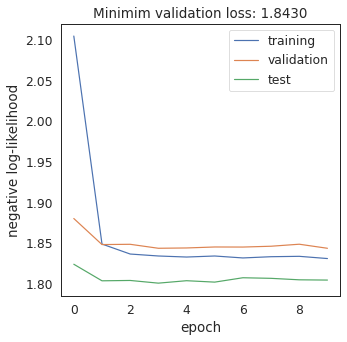

0
10000
20000
30000
40000
LSTM_[100, 100, 100]_bgmm_B=128_D=0_RN=0


In [8]:
# if load_run == None:
#     src = 'CONFIG.py'
#     dst = f'CONFIG_files/CONFIG_{experiment_label}.py'
#     shutil.copy(src, dst)

st_test, predictions, importances = multirun(data, C.predictors, C.params, C.epochs, 
                                split_by = 'station', 
                                draw_samples=False, sequential_samples = True, n_samples=1, 
                                load_run = load_run,
                                experiment_label = experiment_label, 
                                feature_attribution = False, 
                                show_loss_plot=True,
                                use_device='cpu')

In [9]:
# table_of_predictions_ks_test(predictions, C.seasons, columns, sample_cols, add_cols)

In [10]:
# table_of_predictions_for_metric(predictions, C.seasons, columns, C.n_samples, sample_cols, add_cols, metric = 'smape', prefix='smape')

In [11]:
# table_of_predictions_for_metric(predictions, C.seasons, columns, C.n_samples, sample_cols, add_cols, metric = 'edd', prefix='edd')

In [12]:
# table_of_predictions_for_metric(predictions, C.seasons, columns, C.n_samples, sample_cols, add_cols, metric = 'ae', prefix='ae')

In [9]:
a = pd.read_csv('results.csv')

b = a.groupby(['k','run']).agg({'valid_loss': 'min', 
                                 'model_arch': 'first', 
                                 'likelihood_fn': 'first',
                                 'lr':'first',
                                 'batch_size':'first',
                                 'dropout_rate':'first',
                               })

c = b.groupby(['run']).agg({'valid_loss': 'mean', 
                        'model_arch': 'first', 
                        'likelihood_fn': 'first',
                        'lr':'first',
                        'batch_size':'first',
                        'dropout_rate':'first',
                         }
                   ).sort_values('valid_loss').reset_index()

c.groupby(['model_arch',
           'likelihood_fn',
           'lr',
           'batch_size',
           'dropout_rate',
           ]).agg({'valid_loss': 'mean'}
                   ).sort_values('valid_loss').reset_index()

,model_arch,likelihood_fn,lr,batch_size,dropout_rate,valid_loss
0,"('MLP', [50, 50])",bernoulli_lognormal,0.001,32,0,0.963873
1,"('MLP', [50, 50])",bgmm,0.001,32,0,1.308123
2,"('MLP', [50, 50])",gumbel,0.001,32,0,1.315626
3,"('MLP', [50, 50])",halfnormal,0.001,32,0,2.648686
4,"('MLP', [50, 50])",gaussian,0.001,32,0,3.901173
